# Loading Data

In [48]:
import numpy as np
import pandas as pd

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

yellow_taxi_df = pd.read_parquet('yellow_tripdata_2024-11.parquet')

yellow_taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,1,N,239,262,2,-13,-1,-0,0,0,-1,-18,-2,0
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,1,N,239,263,2,13,1,0,0,0,1,18,2,0
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1,34,5,N,219,265,1,259,0,0,15,0,1,275,0,0
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2,1,1,N,186,107,1,10,1,0,1,0,1,16,2,0
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1,0,1,N,79,79,1,6,1,0,1,0,1,12,2,0


# Data Exploration

In this section, we will explore the 'Green Taxi' dataset and understand its characteristics and da

In [29]:
yellow_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [31]:
print(yellow_taxi_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


The dataset has 18 columns, and over 3M rows. Next, we will explore the categorical and numerical attributes in the dataset.

In [26]:
# supress scientific notation by setting float_format
pd.options.display.float_format = '{:.0f}'.format

yellow_taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3646369,3646369,3646369,3272695,3646369,3272695,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3646369,3272695,3272695
mean,2,2024-11-15 17:27:55.648361,2024-11-15 17:45:42.936777,1,5,2,165,164,1,19,1,0,3,1,1,28,2,0
min,1,2002-12-31 22:17:43,2002-12-31 22:23:55,0,0,1,1,1,0,-1458,-8,-0,-94,-141,-1,-1478,-2,-2
25%,2,2024-11-08 16:43:32,2024-11-08 17:05:55,1,1,1,132,113,1,9,0,0,0,0,1,16,2,0
50%,2,2024-11-15 19:11:36,2024-11-15 19:28:02,1,2,1,162,162,1,14,1,0,3,0,1,21,2,0
75%,2,2024-11-22 16:02:55,2024-11-22 16:23:55,1,3,1,234,234,1,23,2,0,4,0,1,30,2,0
max,6,2024-12-01 22:04:33,2024-12-01 23:10:54,9,398609,99,265,265,4,335544,14,41,572,141,1,335551,2,2
std,0,NaN,NaN,1,539,11,65,69,1,177,2,0,4,2,0,177,1,0


In [33]:
yellow_taxi_df.describe(include=["object"])

,store_and_fwd_flag
count,3272695
unique,2
top,N
freq,3265217


Checking NaN values in all attributes

In [42]:
print(yellow_taxi_df.isnull().mean() * 100)

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count         10
trip_distance            0
RatecodeID              10
store_and_fwd_flag      10
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge    10
Airport_fee             10
dtype: float64


In [ ]:
_df = pd.DataFrame(yellow_taxi_df[['VendorID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee']])

numerical_melted_df = numerical_df.melt(var_name='Series',value_name='Values')

graph = sns.FacetGrid(numerical_melted_df, col='Series', sharex=False, sharey=False, height=5, aspect=1.5, col_wrap=4)
graph.map(sns.barplot, 'Values')
graph.fig.suptitle('Boxplots of Numerical Attributes', y=1.02)

plt.show()

### Checking Outliers

/Users/ikmalbasirun/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


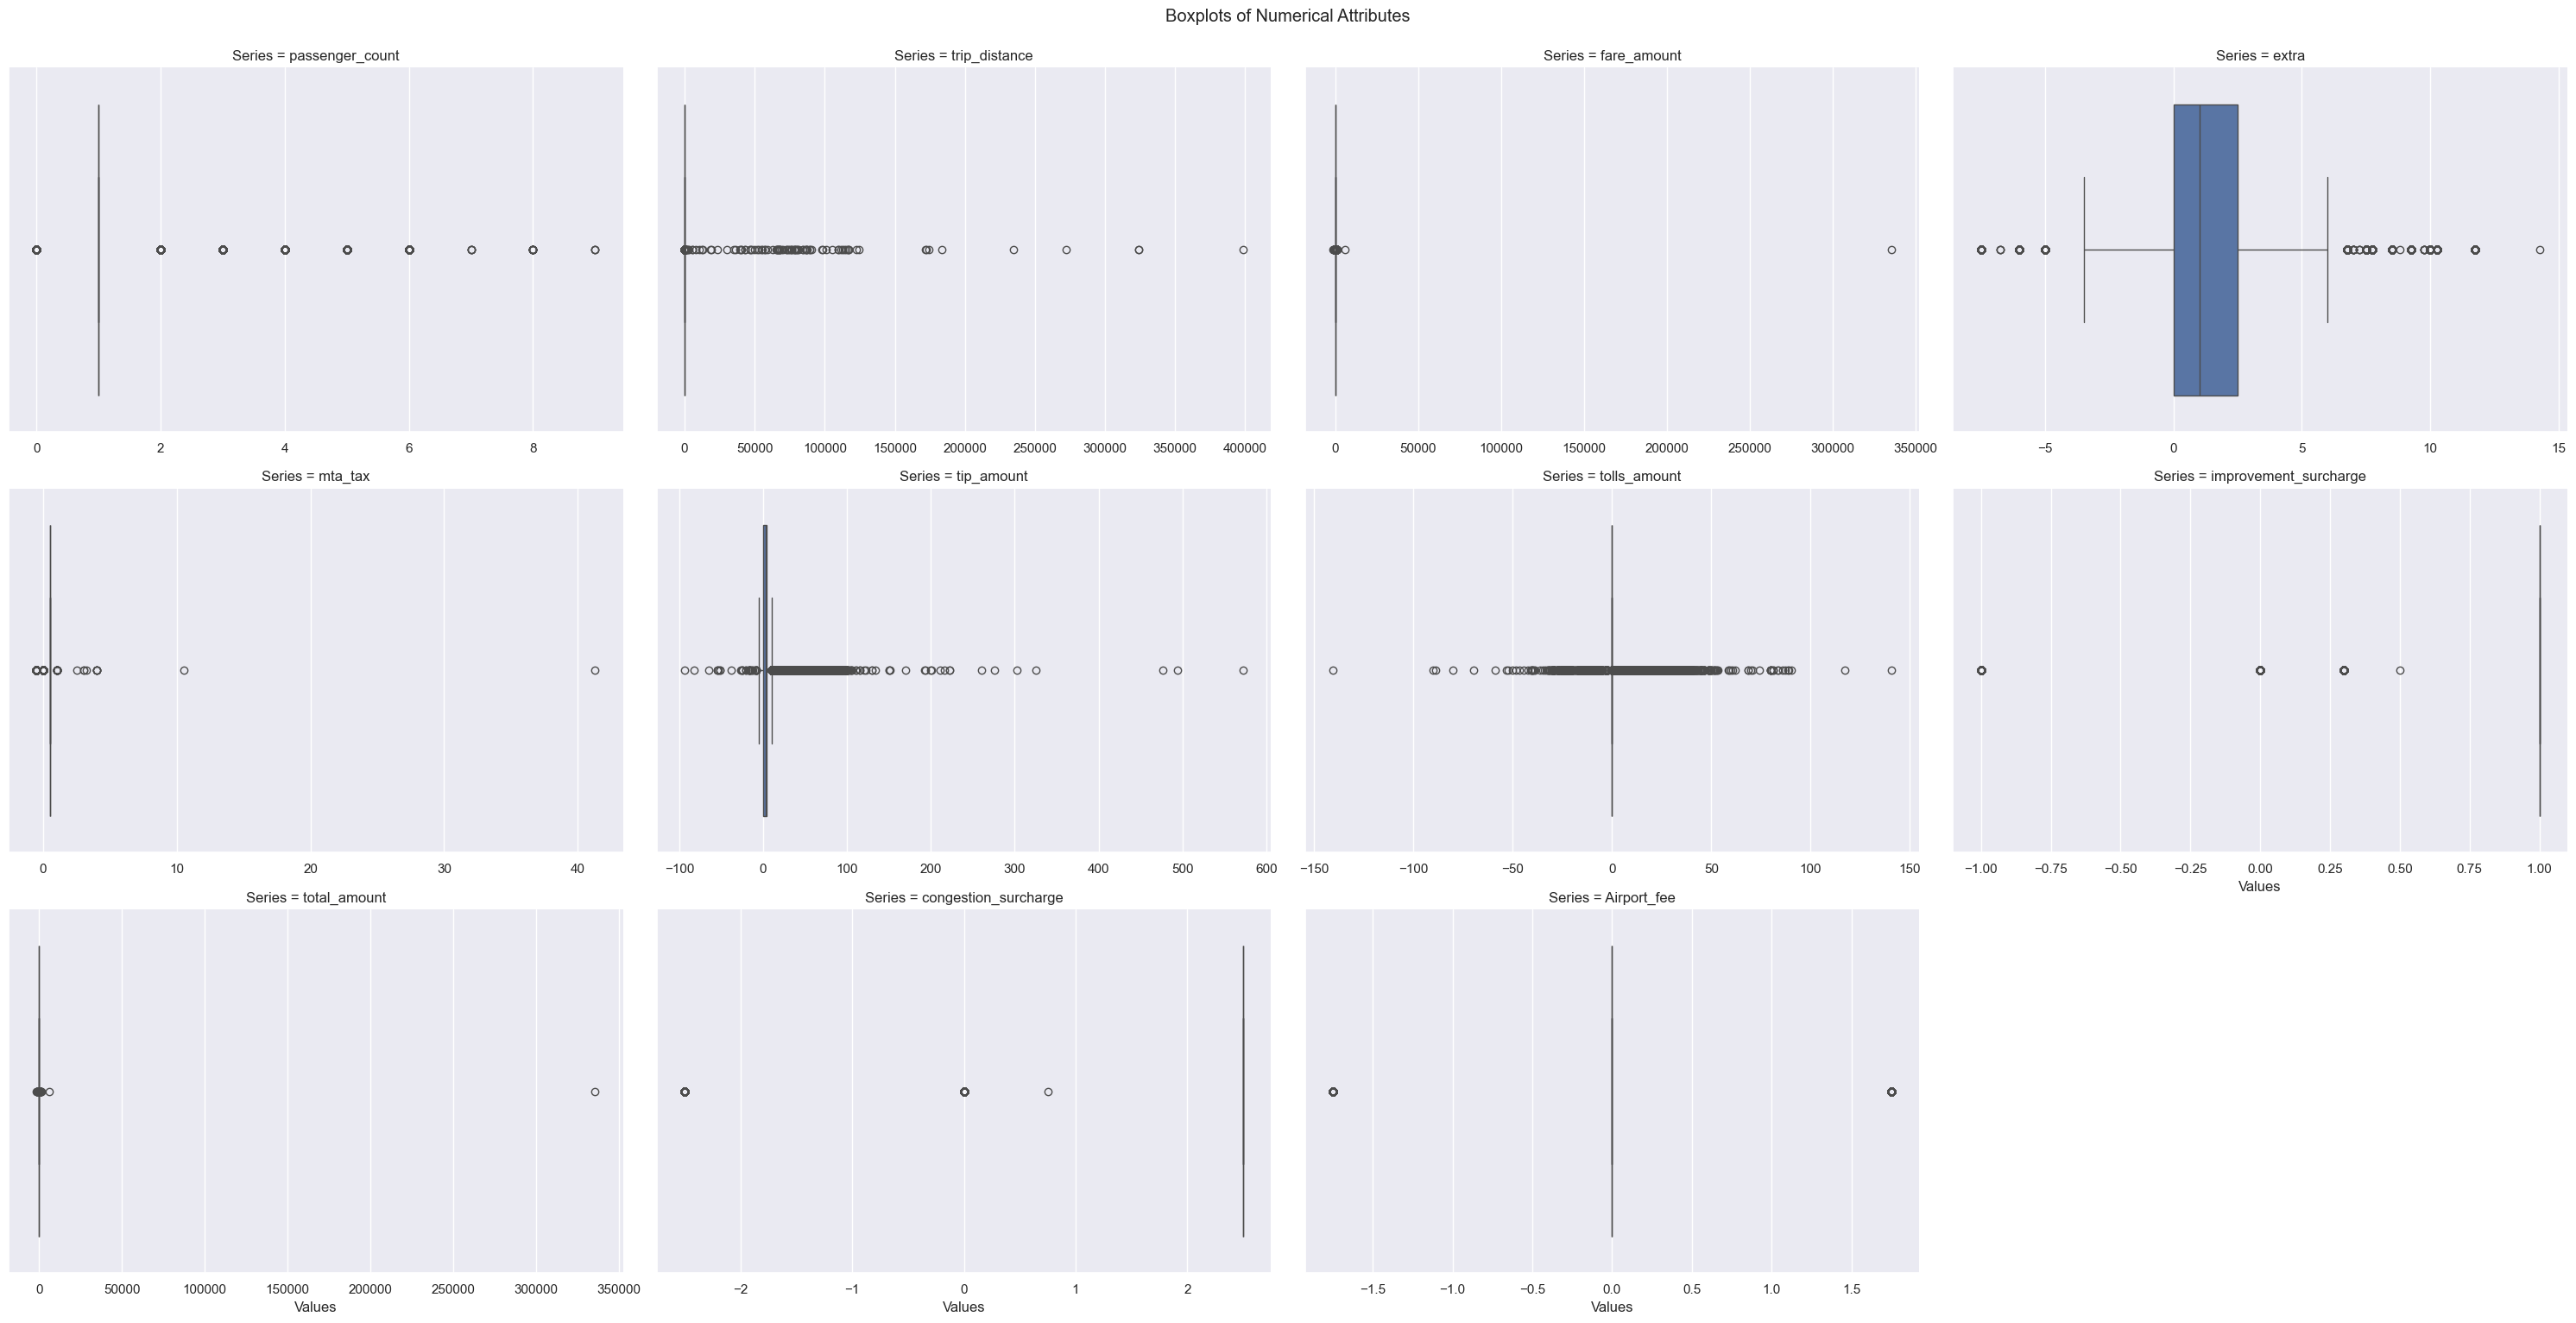

In [50]:
numerical_df = pd.DataFrame(yellow_taxi_df[['passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee']])

numerical_melted_df = numerical_df.melt(var_name='Series',value_name='Values')

graph = sns.FacetGrid(numerical_melted_df, col='Series', sharex=False, sharey=False, height=5, aspect=1.5, col_wrap=4)
graph.map(sns.boxplot, 'Values')
graph.fig.suptitle('Boxplots of Numerical Attributes', y=1.02)

plt.show()

In [ ]:
def outliers(values):
    q1, q3 = np.percentile(values,[25,75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return lower, upper

# calculate the lower and upper outlier limit
lower, upper = outliers(yellow_taxi_df['passenger_count'])

# create filters which remove all rows falling outside of these limits
lower_mask = (yellow_taxi_df['passenger_count'] > lower)
upper_mask = (yellow_taxi_df['passenger_count'] < upper)

# apply the filters to the dataset
cleaned_data = yellow_taxi_df[lower_mask & upper_mask]